In [2]:
import pandas as pd
import matplotlib.pyplot as plt

registrations_df = pd.read_csv('registrations.csv')
payments_df = pd.read_csv('payments.csv')
percentages_df = pd.read_csv('persents.csv')
budget_df = pd.read_excel('Рекламный бюджет январь 2021.xlsx')

In [3]:
#делаем проверку данных
print(registrations_df.dtypes)
print(payments_df.dtypes)
print(percentages_df.dtypes)
print(budget_df.dtypes)

Unnamed: 0        int64
account_id      float64
created_date     object
campaign         object
dtype: object
payment_date      object
Payment_types     object
real_cost        float64
account_id         int64
dtype: object
Unnamed: 0         int64
Payment_types     object
Share, %         float64
dtype: object
media_source       object
Campaign_type      object
Target             object
Plan, USD           int64
Installs            int64
Spend, USD        float64
Deviation, USD    float64
dtype: object


Удаляем пустые значения, лишний столбец, изменяем типы данных на нужные и проверяем на дублекаты registrations_df:

In [4]:
registrations_df = registrations_df.dropna()

In [5]:
registrations_df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
registrations_df['created_date'] = pd.to_datetime(registrations_df['created_date'])

In [7]:
registrations_df['account_id'] = registrations_df['account_id'].astype(int)

In [8]:
print(registrations_df.dtypes)

account_id               int32
created_date    datetime64[ns]
campaign                object
dtype: object


In [9]:
registrations_df = registrations_df.drop_duplicates()

Исправляем значение индексов:

In [10]:
registrations_df = registrations_df.reset_index()

In [11]:
registrations_df.drop(columns=['index'], inplace=True)

In [12]:
registrations_df

,account_id,created_date,campaign
0,3842380,2021-01-01,BRA_MS1_install
1,3842384,2021-01-01,BRA_MS1_install
2,3842389,2021-01-01,RUS_MS1_install
3,3842391,2021-01-01,UKR_MS1_install
4,3842399,2021-01-01,BRA_MS1_install
...,...,...,...
36278,3931503,2021-01-31,ENG_MS2_install
36279,3931508,2021-01-31,ENG_MS2_install
36280,3931509,2021-01-31,ENG_MS2_install
36281,3931514,2021-01-31,BRA_MS1_install


Удаляем пустые значения, изменяем типы данных на нужные и проверяем на дублекаты payments_df:

In [13]:
payments_df = payments_df.dropna()

In [14]:
payments_df['payment_date'] = pd.to_datetime(payments_df['payment_date'])

In [15]:
print(payments_df.dtypes)

payment_date     datetime64[ns]
Payment_types            object
real_cost               float64
account_id                int64
dtype: object


In [16]:
payments_df = payments_df.drop_duplicates()

Проверяем на выбросы payments_df и отфильстровываем их:

In [17]:
# Вычисление межквартильного размаха
Q1 = payments_df['real_cost'].quantile(0.25)
Q3 = payments_df['real_cost'].quantile(0.75)
IQR = Q3 - Q1

In [18]:
# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
# Фильтрация данных, исключая выбросы
filtered_data = payments_df[(payments_df['real_cost'] >= lower_bound) & (payments_df['real_cost'] <= upper_bound)]

In [20]:
print("Выбросы:")
print(payments_df[(payments_df['real_cost'] < lower_bound) | (payments_df['real_cost'] > upper_bound)])

Выбросы:
              payment_date     Payment_types  real_cost  account_id
3      2021-01-01 00:04:27  Payment_system_2    99.9900     3832817
47     2021-01-01 01:41:20  Payment_system_5    35.6161     2259114
60     2021-01-01 02:08:57  Payment_system_5    71.1631     3746885
104    2021-01-01 04:05:21  Payment_system_5    48.1306     3821865
139    2021-01-01 06:58:55  Payment_system_5    29.9600     1051958
...                    ...               ...        ...         ...
303602 2021-12-31 23:51:42  Payment_system_5    47.1110      583846
303610 2021-12-31 23:57:05  Payment_system_5    47.1110     1129267
303611 2021-12-31 23:57:09  Payment_system_5    47.1110      583846
303612 2021-12-31 23:58:09  Payment_system_2    30.1000     4595502
303613 2021-12-31 23:58:46  Payment_system_1    47.1110     3405166

[43938 rows x 4 columns]


In [21]:
print("Данные без выбросов:")
print(filtered_data)

Данные без выбросов:
              payment_date     Payment_types  real_cost  account_id
0      2021-01-01 00:00:56  Payment_system_5   9.650000     2907221
1      2021-01-01 00:01:48  Payment_system_5   0.955872     3228373
2      2021-01-01 00:03:42  Payment_system_5   3.026930      318552
4      2021-01-01 00:06:41  Payment_system_5   1.432550     7229767
5      2021-01-01 00:08:43  Payment_system_5   3.026930     1324961
...                    ...               ...        ...         ...
303605 2021-12-31 23:52:30  Payment_system_5  11.592000     3655258
303606 2021-12-31 23:52:34  Payment_system_5  18.000000     3529413
303607 2021-12-31 23:53:19  Payment_system_5  23.555500     2436454
303608 2021-12-31 23:54:38  Payment_system_5   9.029190     9703156
303609 2021-12-31 23:56:20  Payment_system_5   2.165630     4333575

[259672 rows x 4 columns]


In [22]:
#сохраняем результат
payments_df = filtered_data

Округляем числа до 2 знаков после запятой в столбце 'real_cost' и исправляем значение индексов:

In [23]:
payments_df['real_cost'] = payments_df['real_cost'].round(2)

In [24]:
payments_df = payments_df.reset_index()
payments_df.drop(columns=['index'], inplace=True)

In [25]:
payments_df

,payment_date,Payment_types,real_cost,account_id
0,2021-01-01 00:00:56,Payment_system_5,9.65,2907221
1,2021-01-01 00:01:48,Payment_system_5,0.96,3228373
2,2021-01-01 00:03:42,Payment_system_5,3.03,318552
3,2021-01-01 00:06:41,Payment_system_5,1.43,7229767
4,2021-01-01 00:08:43,Payment_system_5,3.03,1324961
...,...,...,...,...
259667,2021-12-31 23:52:30,Payment_system_5,11.59,3655258
259668,2021-12-31 23:52:34,Payment_system_5,18.00,3529413
259669,2021-12-31 23:53:19,Payment_system_5,23.56,2436454
259670,2021-12-31 23:54:38,Payment_system_5,9.03,9703156


Удаляем лишний столбец в percentages_df:

In [26]:
percentages_df.drop(columns=['Unnamed: 0'], inplace=True)

In [27]:
percentages_df

,Payment_types,"Share, %"
0,Payment_system_1,20.7
1,Payment_system_2,15.0
2,Payment_system_3,58.5
3,Payment_system_4,0.0
4,Payment_system_5,24.0


Исправим таблицу budget_df для удобной работы:

In [28]:
#удалим строку с итогами
budget_df.drop(budget_df[budget_df['media_source'] == 'Total'].index, inplace=True)

In [29]:
#заполним пустые значения в столбце 'media_source'
budget_df['media_source'].fillna(method='ffill', inplace=True)

In [30]:
#добавим столбец с удобными обозначениями РК
campaign_values = ['BRA_MS1_install', 'BRA_MS1_purchase', 'RUS_MS1_install', 'RUS_MS1_purchase', 'UKR_MS1_install', 'UKR_MS1_purchase', 'BRA_MS2_install', 'ENG_MS2_install']
budget_df['campaign'] = campaign_values

In [31]:
budget_df

,media_source,Campaign_type,Target,"Plan, USD",Installs,"Spend, USD","Deviation, USD",campaign
0,Media_source_1,install,Brazil,100,10460,99.12,0.88,BRA_MS1_install
1,Media_source_1,purchase,Brazil,400,1081,398.67,1.33,BRA_MS1_purchase
2,Media_source_1,install,Russia,200,11894,246.30,-46.30,RUS_MS1_install
3,Media_source_1,purchase,Russia,500,1441,616.77,-116.77,RUS_MS1_purchase
4,Media_source_1,install,Ukrane,100,6424,99.43,0.57,UKR_MS1_install
5,Media_source_1,purchase,Ukrane,500,242,348.13,151.87,UKR_MS1_purchase
6,Media_source_2,install,Brazil,100,152,81.15,18.85,BRA_MS2_install
7,Media_source_2,install,English_speaking,100,371,99.95,0.05,ENG_MS2_install


1.	Определить оптимальный срок оценки окупаемости рекламных кампаний:
Это можно сделать путем анализа времени, можно начать с расчета среднего времени между регистрацией пользователя и первым платежом. Это поможет нам понять, как быстро пользователи начинают совершать покупки после регистрации. Посчитаем метрику ROI (Окупаемость инвестиций).

In [32]:
merged_df = pd.merge(registrations_df, payments_df, on='account_id', how='inner')

In [33]:
merged_df['time_to_payment'] = merged_df['payment_date'] - merged_df['created_date']

In [34]:
merged_df

,account_id,created_date,campaign,payment_date,Payment_types,real_cost,time_to_payment
0,3842719,2021-01-01,BRA_MS1_install,2021-10-09 00:30:53,Payment_system_5,17.26,281 days 00:30:53
1,3843913,2021-01-01,RUS_MS1_purchase,2021-01-02 13:21:20,Payment_system_5,0.96,1 days 13:21:20
2,3844647,2021-01-01,BRA_MS1_install,2021-01-01 17:16:09,Payment_system_5,9.62,0 days 17:16:09
3,3844647,2021-01-01,BRA_MS1_install,2021-01-01 17:17:45,Payment_system_5,9.62,0 days 17:17:45
4,3844888,2021-01-01,RUS_MS1_install,2021-05-03 23:21:34,Payment_system_5,0.80,122 days 23:21:34
...,...,...,...,...,...,...,...
666,3928779,2021-01-30,BRA_MS1_purchase,2021-03-20 02:11:30,Payment_system_5,0.91,49 days 02:11:30
667,3930244,2021-01-31,UKR_MS1_install,2021-03-01 12:03:16,Payment_system_4,0.26,29 days 12:03:16
668,3931163,2021-01-31,ENG_MS2_install,2021-06-18 17:30:38,Payment_system_5,9.98,138 days 17:30:38
669,3931163,2021-01-31,ENG_MS2_install,2021-06-25 16:23:24,Payment_system_5,5.09,145 days 16:23:24


In [35]:
print(merged_df['time_to_payment'].describe())

count                            671
mean     130 days 21:21:32.505216096
std      116 days 20:43:01.563898812
min               -26 days +09:19:41
25%                  9 days 16:29:26
50%                102 days 18:59:15
75%                248 days 23:22:54
max                358 days 20:58:48
Name: time_to_payment, dtype: object


Мы видим из статистики по времени до первого платежа:

- Среднее время между регистрацией и первым платежом составляет примерно 130 дней.
- Медианное время составляет около 102 дня, что говорит о том, что половина пользователей делает первый платеж менее, чем через 102 дней после регистрации.
- Стандартное отклонение равно примерно 116 дням, что означает, что разброс времени до первого платежа довольно большой.
- Минимальное время составляет всего -26 дней (оплачивают перед ренистрацией), а максимальное - 358 дней.
Эти данные дают представление о том, что пользователи обычно совершают первый платеж в течение нескольких месяцев после регистрации. Это важная информация для определения оптимального срока оценки окупаемости рекламных кампаний.

Считаем ROI:

In [36]:
revenue_per_campaign = merged_df.groupby('campaign')['real_cost'].sum()
spend_per_campaign = budget_df.groupby('campaign')['Spend, USD'].sum()
roi_per_campaign = (revenue_per_campaign - spend_per_campaign) / spend_per_campaign * 100

Посторим график:

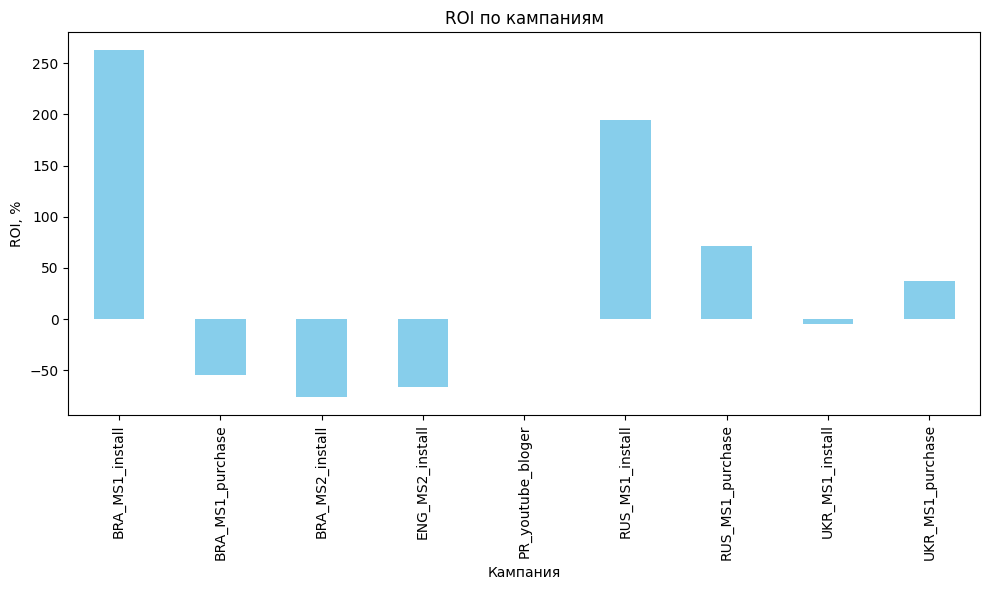

In [37]:
# Построение графика ROI по кампаниям
plt.figure(figsize=(10, 6))

# Построение графика
roi_per_campaign.plot(kind='bar', color='skyblue')

# Настройка заголовка и меток осей
plt.title('ROI по кампаниям')
plt.xlabel('Кампания')
plt.ylabel('ROI, %')

# Показать график
plt.tight_layout()
plt.show()

2. Определить наиболее успешные:
* Рекламные кампании
* Типы рекламных кампаний
* Рекламные сети
Это можно сделать на основе ключевых показателей, таких как количество установок, суммарные платежи, отношение платежей к установкам и другие.

Перед тем, как приступить к вычислению успешных рекламных кампаний, необходимо вычесть комиссию платежных систем из суммы платежа.

In [38]:
#обьединяем данные для вычислений
m_df = pd.merge(merged_df, percentages_df, on='Payment_types', how='inner')

In [39]:
m_df['tr_cost'] = m_df['real_cost'] - m_df['real_cost'] / 100 * m_df['Share, %']

In [40]:
#удаляем лишние столбцы
m_df.drop(columns=['Share, %','real_cost','Payment_types', 'time_to_payment'], inplace=True)

In [41]:
m_df

,account_id,created_date,campaign,payment_date,tr_cost
0,3842719,2021-01-01,BRA_MS1_install,2021-10-09 00:30:53,13.1176
1,3843913,2021-01-01,RUS_MS1_purchase,2021-01-02 13:21:20,0.7296
2,3844647,2021-01-01,BRA_MS1_install,2021-01-01 17:16:09,7.3112
3,3844647,2021-01-01,BRA_MS1_install,2021-01-01 17:17:45,7.3112
4,3844888,2021-01-01,RUS_MS1_install,2021-05-03 23:21:34,0.6080
...,...,...,...,...,...
666,3877457,2021-01-12,PR_youtube_bloger,2021-01-12 20:59:05,1.1050
667,3877457,2021-01-12,PR_youtube_bloger,2021-01-13 18:32:55,3.3150
668,3892862,2021-01-17,BRA_MS1_install,2021-08-28 01:34:23,8.1685
669,3921730,2021-01-27,BRA_MS1_purchase,2021-06-19 15:49:51,2.0060


Группируем данные по рекламным кампаниям и рассчитываем ключевые метрики:

In [42]:
campaign_stats = m_df.groupby('campaign').agg({
    'account_id': 'count',
    'tr_cost': 'sum'
}).reset_index()

In [43]:
campaign_stats

,campaign,account_id,tr_cost
0,BRA_MS1_install,104,279.10383
1,BRA_MS1_purchase,40,137.01120
2,BRA_MS2_install,8,15.20030
3,ENG_MS2_install,10,25.62520
4,PR_youtube_bloger,23,53.29200
5,RUS_MS1_install,183,572.19369
6,RUS_MS1_purchase,194,808.63565
7,UKR_MS1_install,51,74.11003
8,UKR_MS1_purchase,58,364.01059


In [44]:
#обьедием таблицы campaign_stats и budget_df
merged_df2 = pd.merge(campaign_stats, budget_df, on='campaign', how='left')

In [45]:
merged_df2

,campaign,account_id,tr_cost,media_source,Campaign_type,Target,"Plan, USD",Installs,"Spend, USD","Deviation, USD"
0,BRA_MS1_install,104,279.10383,Media_source_1,install,Brazil,100.0,10460.0,99.12,0.88
1,BRA_MS1_purchase,40,137.01120,Media_source_1,purchase,Brazil,400.0,1081.0,398.67,1.33
2,BRA_MS2_install,8,15.20030,Media_source_2,install,Brazil,100.0,152.0,81.15,18.85
3,ENG_MS2_install,10,25.62520,Media_source_2,install,English_speaking,100.0,371.0,99.95,0.05
4,PR_youtube_bloger,23,53.29200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,RUS_MS1_install,183,572.19369,Media_source_1,install,Russia,200.0,11894.0,246.30,-46.30
6,RUS_MS1_purchase,194,808.63565,Media_source_1,purchase,Russia,500.0,1441.0,616.77,-116.77
7,UKR_MS1_install,51,74.11003,Media_source_1,install,Ukrane,100.0,6424.0,99.43,0.57
8,UKR_MS1_purchase,58,364.01059,Media_source_1,purchase,Ukrane,500.0,242.0,348.13,151.87


In [46]:
#удаляем лишние столбцы
merged_df2.drop(columns=['Target','Plan, USD', 'Deviation, USD'], inplace=True)

In [47]:
merged_df2['revenue'] = merged_df2['tr_cost'] - merged_df2['Spend, USD']

Добавили фактическое количество установок к нашей таблице и посчитали прибыль:

In [48]:
merged_df2

,campaign,account_id,tr_cost,media_source,Campaign_type,Installs,"Spend, USD",revenue
0,BRA_MS1_install,104,279.10383,Media_source_1,install,10460.0,99.12,179.98383
1,BRA_MS1_purchase,40,137.01120,Media_source_1,purchase,1081.0,398.67,-261.65880
2,BRA_MS2_install,8,15.20030,Media_source_2,install,152.0,81.15,-65.94970
3,ENG_MS2_install,10,25.62520,Media_source_2,install,371.0,99.95,-74.32480
4,PR_youtube_bloger,23,53.29200,NaN,NaN,NaN,NaN,NaN
5,RUS_MS1_install,183,572.19369,Media_source_1,install,11894.0,246.30,325.89369
6,RUS_MS1_purchase,194,808.63565,Media_source_1,purchase,1441.0,616.77,191.86565
7,UKR_MS1_install,51,74.11003,Media_source_1,install,6424.0,99.43,-25.31997
8,UKR_MS1_purchase,58,364.01059,Media_source_1,purchase,242.0,348.13,15.88059


Определение наиболее успешной рекламной кампании:

In [49]:
sorted_df = merged_df2.sort_values(by='revenue', ascending=False)
sorted_df = sorted_df[['campaign', 'revenue']].iloc[0]
print("Наиболее успешная рекламная кампания:")
print(sorted_df)

Наиболее успешная рекламная кампания:
campaign    RUS_MS1_install
revenue           325.89369
Name: 5, dtype: object


Определение наиболее успешный тип рекламной кампании:

In [50]:
gr_df = merged_df2.groupby('Campaign_type').agg({'revenue': 'sum'}).reset_index()
sorted_df2 = gr_df.sort_values(by='revenue', ascending=False)
sorted_df2 = sorted_df2[['Campaign_type', 'revenue']].iloc[0]
print("Наиболее успешный тип рекламной кампании:")
print(sorted_df2)

Наиболее успешный тип рекламной кампании:
Campaign_type      install
revenue          340.28305
Name: 0, dtype: object


Определение наиболее успешная рекламная сеть:

In [51]:
gr_df2 = merged_df2.groupby('media_source').agg({'revenue': 'sum'}).reset_index()
sorted_df3 = gr_df2.sort_values(by='revenue', ascending=False)
sorted_df3 = sorted_df3[['media_source', 'revenue']].iloc[0]
print("Наиболее успешная рекламная сеть:")
print(sorted_df3)

Наиболее успешная рекламная сеть:
media_source    Media_source_1
revenue              426.64499
Name: 0, dtype: object


3.	Рассчитать накопительный ARPU (average revenue per user) успешных рекламных кампаний, оптимизированных под покупки, на 7, 14, 30 день, для прогноза окупаемости новых рекламных кампаний.

Определение успешных рекламных кампаний, оптимизированных под покупки:

In [52]:
merged_df2[['campaign',	'account_id', 'tr_cost', 'Installs', 'Spend, USD','revenue']]

,campaign,account_id,tr_cost,Installs,"Spend, USD",revenue
0,BRA_MS1_install,104,279.10383,10460.0,99.12,179.98383
1,BRA_MS1_purchase,40,137.01120,1081.0,398.67,-261.65880
2,BRA_MS2_install,8,15.20030,152.0,81.15,-65.94970
3,ENG_MS2_install,10,25.62520,371.0,99.95,-74.32480
4,PR_youtube_bloger,23,53.29200,NaN,NaN,NaN
5,RUS_MS1_install,183,572.19369,11894.0,246.30,325.89369
6,RUS_MS1_purchase,194,808.63565,1441.0,616.77,191.86565
7,UKR_MS1_install,51,74.11003,6424.0,99.43,-25.31997
8,UKR_MS1_purchase,58,364.01059,242.0,348.13,15.88059


In [53]:
filtered_df = merged_df2[(merged_df2['Campaign_type'] == 'purchase') & (merged_df2['revenue'] > 0)].sort_values(by='revenue', ascending=False)

In [54]:
filtered_df[['campaign','account_id','Campaign_type', 'Installs', 'revenue']]

,campaign,account_id,Campaign_type,Installs,revenue
6,RUS_MS1_purchase,194,purchase,1441.0,191.86565
8,UKR_MS1_purchase,58,purchase,242.0,15.88059


Рассчитываем накопительный ARPU на 7, 14, 30 день:

In [55]:
m_df['payment_date'] = m_df['payment_date'].dt.date

In [56]:
m_df['payment_date'] = pd.to_datetime(m_df['payment_date'])

In [57]:
m_df

,account_id,created_date,campaign,payment_date,tr_cost
0,3842719,2021-01-01,BRA_MS1_install,2021-10-09,13.1176
1,3843913,2021-01-01,RUS_MS1_purchase,2021-01-02,0.7296
2,3844647,2021-01-01,BRA_MS1_install,2021-01-01,7.3112
3,3844647,2021-01-01,BRA_MS1_install,2021-01-01,7.3112
4,3844888,2021-01-01,RUS_MS1_install,2021-05-03,0.6080
...,...,...,...,...,...
666,3877457,2021-01-12,PR_youtube_bloger,2021-01-12,1.1050
667,3877457,2021-01-12,PR_youtube_bloger,2021-01-13,3.3150
668,3892862,2021-01-17,BRA_MS1_install,2021-08-28,8.1685
669,3921730,2021-01-27,BRA_MS1_purchase,2021-06-19,2.0060


Определили пользователей, привлеченных успешными кампаниями.

In [58]:
successful_campaigns = ['UKR_MS1_purchase', 'RUS_MS1_purchase','BRA_MS1_purchase']  
successful_users = m_df[m_df['campaign'].isin(successful_campaigns)]

In [59]:
successful_users

,account_id,created_date,campaign,payment_date,tr_cost
1,3843913,2021-01-01,RUS_MS1_purchase,2021-01-02,0.72960
44,3845613,2021-01-02,RUS_MS1_purchase,2021-01-02,0.72960
53,3848288,2021-01-02,RUS_MS1_purchase,2021-02-19,7.72160
54,3848288,2021-01-02,RUS_MS1_purchase,2021-02-19,7.72160
55,3848288,2021-01-02,RUS_MS1_purchase,2021-02-28,7.68360
...,...,...,...,...,...
648,3894854,2021-01-17,RUS_MS1_purchase,2021-10-10,0.65819
653,3911977,2021-01-24,UKR_MS1_purchase,2021-01-28,0.63440
654,3911977,2021-01-24,UKR_MS1_purchase,2021-01-29,1.97457
660,3923332,2021-01-28,RUS_MS1_purchase,2021-03-18,0.65026


In [60]:
from datetime import datetime

In [61]:
revenue_7_days = []
revenue_14_days = []
revenue_30_days = []

# Рассчитываем выручку на каждый из дней
for index, record in successful_users.iterrows():
    created_date = record['created_date'] 
    payment_date = record['payment_date']
    days_to_payment = (payment_date - created_date).days
    tr_cost = record['tr_cost']

    # Проверяем, в какой список добавить выручку в зависимости от количества дней до оплаты
    if days_to_payment <= 7:
        revenue_7_days.append(tr_cost)
    if days_to_payment <= 14:
        revenue_14_days.append(tr_cost)
    if days_to_payment <= 30:
        revenue_30_days.append(tr_cost)

# Рассчитываем ARPU на 7, 14 и 30 день
arpu_7_days = sum(revenue_7_days) / len(revenue_7_days) if revenue_7_days else 0
arpu_14_days = sum(revenue_14_days) / len(revenue_14_days) if revenue_14_days else 0
arpu_30_days = sum(revenue_30_days) / len(revenue_30_days) if revenue_30_days else 0

print("ARPU на 7 день:", arpu_7_days)
print("ARPU на 14 день:", arpu_14_days)
print("ARPU на 30 день:", arpu_30_days)

ARPU на 7 день: 2.1385755405405407
ARPU на 14 день: 2.101080886075949
ARPU на 30 день: 2.835024141414143


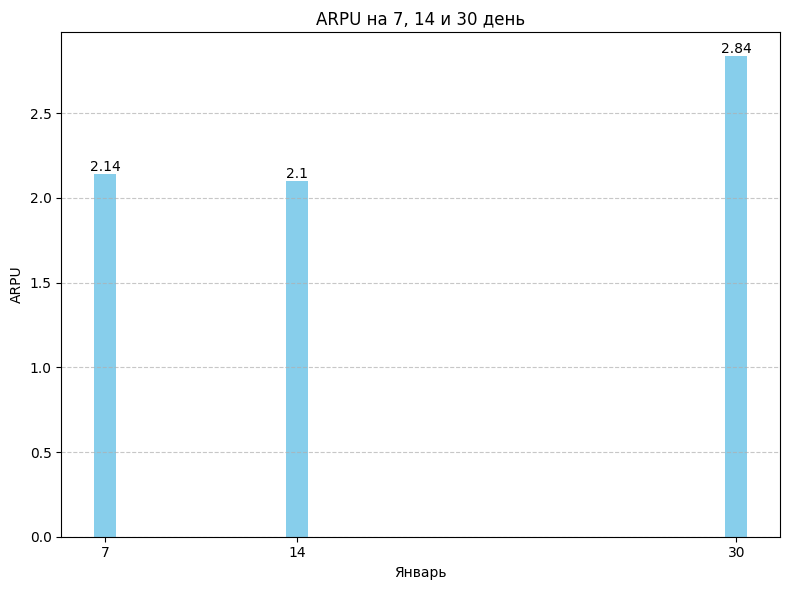

In [62]:
import matplotlib.pyplot as plt

days = [7, 14, 30]

arpus = [arpu_7_days, arpu_14_days, arpu_30_days]

plt.figure(figsize=(8, 6))
plt.bar(days, arpus, color='skyblue')

plt.title('ARPU на 7, 14 и 30 день')
plt.xlabel('Январь')
plt.ylabel('ARPU')

for i in range(len(days)):
    plt.text(days[i], arpus[i], round(arpus[i], 2), ha='center', va='bottom')

plt.xticks(days)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4.	Рассчитать фактический CPI (cost per install) для каждой рекламной кампании

In [63]:
cpi_df = merged_df2.loc[merged_df2['Campaign_type'] == 'install', ['campaign', 'Campaign_type', 'account_id', 'tr_cost', 'Installs', 'Spend, USD', 'revenue']]
cpi_df['CPI'] = cpi_df['Spend, USD'] / cpi_df['Installs']
cpi_df

,campaign,Campaign_type,account_id,tr_cost,Installs,"Spend, USD",revenue,CPI
0,BRA_MS1_install,install,104,279.10383,10460.0,99.12,179.98383,0.009476
2,BRA_MS2_install,install,8,15.20030,152.0,81.15,-65.94970,0.533882
3,ENG_MS2_install,install,10,25.62520,371.0,99.95,-74.32480,0.269407
5,RUS_MS1_install,install,183,572.19369,11894.0,246.30,325.89369,0.020708
7,UKR_MS1_install,install,51,74.11003,6424.0,99.43,-25.31997,0.015478


In [64]:
cpi_df['CPI'] = cpi_df['Spend, USD'] / cpi_df['Installs']
cpi_df

,campaign,Campaign_type,account_id,tr_cost,Installs,"Spend, USD",revenue,CPI
0,BRA_MS1_install,install,104,279.10383,10460.0,99.12,179.98383,0.009476
2,BRA_MS2_install,install,8,15.20030,152.0,81.15,-65.94970,0.533882
3,ENG_MS2_install,install,10,25.62520,371.0,99.95,-74.32480,0.269407
5,RUS_MS1_install,install,183,572.19369,11894.0,246.30,325.89369,0.020708
7,UKR_MS1_install,install,51,74.11003,6424.0,99.43,-25.31997,0.015478


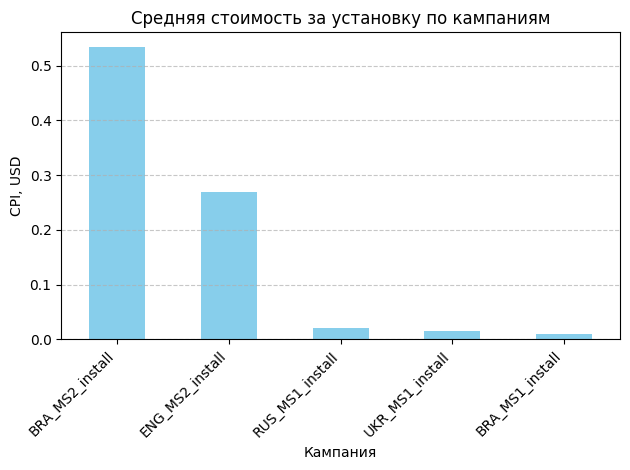

In [65]:
average_cpi = cpi_df.groupby('campaign')['CPI'].mean().sort_values(ascending=False)
average_cpi.plot(kind='bar', color='skyblue')
plt.title('Средняя стоимость за установку по кампаниям')
plt.xlabel('Кампания')
plt.ylabel('CPI, USD')
plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи оси X для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()